## Import

In [1]:
import xarray as xr
import matplotlib.pyplot as plt 
import fssp
import numpy as npec
from datetime import datetime

## Subset

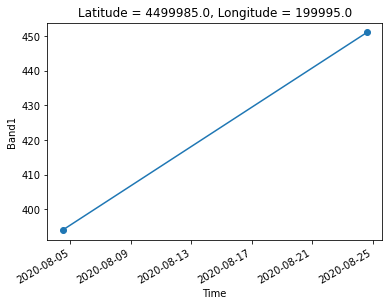

In [3]:
mapper = fsspec.get_mapper('s3://gstp-benchmark/zarr/s2_hypercube.zarr/', anon=True)
dataset = xr.open_zarr(mapper)
start = datetime.fromisoformat("2020-08-01")
end = datetime.fromisoformat("2020-08-31")
timeserie = dataset['Band1'].sel(Time=slice(start,end), Longitude=199995, Latitude=4499985).compute()
timeserie.plot.line(marker="o")

## Condense

In [12]:
import numpy as np
import xarray as xr
import fsspec

# Open the Zarr dataset
mapper = fsspec.get_mapper('s3://gstp-benchmark/zarr/s2_hypercube.zarr/', anon=True)
dataset = xr.open_zarr(mapper)

print(dataset.Time)

# Compute the list of desired indexes based on shape and iteration step
max_index = dataset.Time.size
indexes = np.arange(0,max_index,2) # From 0 to Max with a step of 10
print(indexes) 
# Condense band1 
condensed_band1 = dataset['Band1'].isel(Time=indexes)
print('Results')
print(condensed_band1[dict(Latitude=0,Longitude=0)])

<xarray.DataArray 'Time' (Time: 10)>
array(['2020-08-04T11:38:47.000', '2020-08-24T15:04:32.000',
       '2020-09-03T13:22:33.000', '2020-09-13T13:25:24.000',
       '2020-09-23T13:22:28.000', '2020-10-03T13:23:25.000',
       '2020-10-19T14:38:16.000', '2020-10-23T13:21:54.000',
       '2020-11-02T13:23:29.000', '2020-11-12T13:25:51.000'],
      dtype='datetime64[ms]')
Coordinates:
  * Time     (Time) datetime64[ms] 2020-08-04T11:38:47 ... 2020-11-12T13:25:51
[0 2 4 6 8]
Results
<xarray.DataArray 'Band1' (Time: 5)>
array([411., 398., 498., 705., 392.], dtype=float32)
Coordinates:
    Latitude   float64 4.5e+06
    Longitude  float64 2e+05
  * Time       (Time) datetime64[ms] 2020-08-04T11:38:47 ... 2020-11-02T13:23:29


In [28]:
dataset.Time.size


10

In [14]:
import xarray as xr
import matplotlib.pyplot as plt 
from datetime import datetime

# Open the Zarr dataset
mapper = fsspec.get_mapper('s3://gstp-benchmark/zarr/s2/S2A_MSIL1C_20200804T110631_N0209_R137_T30TTK_20200804T113847.zarr/', anon=True)
dataset = xr.open_zarr(mapper)

# Subset on the time axis
time = datetime.fromisoformat('2020-08-04T11:38:47').timestamp()
subset = dataset['Band1'].sel(Time=time).compute()

# Generate the plot from the subset (pseudocolor plot using predefined colormap 'terrain')
subset.plot.pcolormesh(cmap='terrain')

# Save figure to PNG file.
plt.savefig('E:\\test\\Satellite_images\\s2\\test_export_terrain.png')


KeyError: 'Time is not a valid dimension or coordinate'

In [12]:
import xarray as xr

# Open the Zarr dataset.
mapper = fsspec.get_mapper('s3://gstp-benchmark/zarr/s2_hypercube.zarr/', anon=True)
dataset = xr.open_zarr(mapper)

# Display dataset metadata in the Standard output
print(dataset)
# Display only dataset coordinates
print("Coordinates: ",dataset.coords)
# Display only dataset attributes
print("Attributes: ",dataset.attrs)





<xarray.Dataset>
Dimensions:    (Time: 10, Latitude: 10980, Longitude: 10980)
Coordinates:
  * Latitude   (Latitude) float64 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
  * Longitude  (Longitude) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05
  * Time       (Time) datetime64[ms] 2020-08-04T11:38:47 ... 2020-11-12T13:25:51
Data variables:
    Band1      (Time, Latitude, Longitude) float32 ...
    Band2      (Time, Latitude, Longitude) float32 ...
    Band3      (Time, Latitude, Longitude) float32 ...
    Band4      (Time, Latitude, Longitude) float32 ...
Coordinates:  Coordinates:
  * Latitude   (Latitude) float64 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
  * Longitude  (Longitude) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05
  * Time       (Time) datetime64[ms] 2020-08-04T11:38:47 ... 2020-11-12T13:25:51
Attributes:  {}


## Metadata

In [15]:
import xarray as xr

# Open the Zarr dataset.
mapper = fsspec.get_mapper('s3://gstp-benchmark/zarr/s2/S2A_MSIL1C_20200804T110631_N0209_R137_T30TTK_20200804T113847.zarr/', anon=True)
dataset = xr.open_zarr(mapper)

# Display dataset metadata in the Standard output
print(dataset)
# Display only dataset coordinates
print("Coordinates: ",dataset.coords)
# Display only dataset attributes
print("Attributes: ",dataset.attrs)




<xarray.Dataset>
Dimensions:  (Y: 10980, X: 10980)
Coordinates:
  * X        (X) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
  * Y        (Y) float64 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06 4.39e+06
Data variables:
    Band1    (Y, X) uint16 ...
    Band2    (Y, X) uint16 ...
    Band3    (Y, X) uint16 ...
    Band4    (Y, X) uint16 ...
Coordinates:  Coordinates:
  * X        (X) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
  * Y        (Y) float64 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06 4.39e+06
Attributes:  {}


In [12]:
import xarray as xr
import matplotlib.pyplot as plt 
from datetime import datetime

# Open the Zarr dataset
dataset = xr.open_zarr('E:\\test\\Satellite_images\\GSTP\\s2_hypercube.zarr', consolidated=True)

# Groub by month
b04 = dataset['Band3'].groupby("Time.month").mean("Time").isel(month=0)
print("Subset: ", b04)

b08 = dataset['Band4'].groupby("Time.month").mean("Time").isel(month=0)
print("Subset: ", b08)


ndvi = (b08 - b04) / (b08 + b04)

# Generate the plot from the subset (pseudocolor plot using predefined colormap 'terrain')
ndvi.plot.pcolormesh(cmap='terrain')

# Save figure to PNG file.
plt.savefig('E:\\test\\Satellite_images\\s2\\test_ndvi.png')


KeyError: '.zmetadata'

In [ ]:
# https://gis.stackexchange.com/questions/290138/extracting-values-at-specific-latitude-longitude-from-modis-swath-data
import xarray as xr
import numpy as np

dataset = xr.open_zarr('E:\\test\\Satellite_images\\GSTP\\prisma\\spain\\wavelength\\20200804111827.zarr')
print(dataset)

#Compute desired Lat/Lon indexes from SWATH structure
long_obs = -5.9 
lat_obs = 39.9 
Longitude =  dataset.longitude.data.compute()
Latitude =  dataset.latitude.data.compute()
coordinates = np.unravel_index((np.abs(Latitude - lat_obs) + np.abs(Longitude - long_obs)).argmin(), Latitude.shape)
print(coordinates)

#Apply subsetting
subset = dataset['cube'].sel(yc=coordinates[0], xc=coordinates[1], wavelength=slice(400,800)).compute()
print(subset)
#Apply mean function on the subsetted data.
result = np.mean(subset)
print('Mean: ', result.data)

In [ ]:
# Test reprojection from UTM30 to EPSG4326 with cartopy

import cartopy

src_crs = cartopy.crs.Geodetic() # Geodetic WGS84
dest_crs = cartopy.crs.UTM(30) # UTM Zone 30
points = src_crs.transform_point(199995,4499985,dest_crs) # Transform UTM Zone 30 coordinates to WGS 84
print(points)

import xarray as xr
from pyproj import Transformer

# Retrieve dataset and coordinates
dataset = xr.open_zarr('E:\\test\\Satellite_images\\s2\\out.zarr', consolidated=True)
lat = dataset.Latitude.data
lon = dataset.Longitude.data

# Reproject coordinates
transformer = Transformer.from_crs(32630, 4326) # UTM30 to EPSG 4326
latlon_reprojected = transformer.transform(lon,lat) #Reproject lat lon
new_lon = latlon_reprojected[0]
new_lat = latlon_reprojected[1]

# Assign reprojected coordinates
dataset = dataset.assign_coords(Latitude=new_lat)
dataset = dataset.assign_coords(Longitude=new_lon)
dataset = dataset.assign_coords({"Longitude": new_lon, "Latitude": new_lat})

# Save dataset
dataset.to_zarr('E:\\test\\Satellite_images\\s2\\out_reprojected_4326.zarr')


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt 
from datetime import datetime

# Open the Zarr dataset.
dataset = xr.open_zarr('E:\\test\\Satellite_images\\GSTP\\s2_hypercube.zarr', consolidated=True)

# Slice on the time axis of a specific geographial point.
start = datetime.fromisoformat("2020-08-01")
end = datetime.fromisoformat("2020-08-31")
timeserie = dataset['Band1'].sel(Time=slice(start,end), Longitude=199995, Latitude=4499985).compute()
print(timeserie)

# Generate the plot from the timeserie.
timeserie.plot.line(marker="o")

# Save figure to PNG file.
plt.savefig('E:\\test\\Satellite_images\\s2\\test_timeserie.png')



In [ ]:
import xarray as xr
import matplotlib.pyplot as plt 
from datetime import datetime

# Open the Zarr dataset
dataset = xr.open_zarr('E:\\test\\Satellite_images\\GSTP\\s2_hypercube.zarr', consolidated=True)

# Regroup on the time axis
mean = dataset['Band1'].groupby("Time.month").mean("Time")

print(mean)

subset = mean.isel(month=1)

print("Subset: ", subset)

# Generate the plot from the subset (pseudocolor plot using predefined colormap 'terrain')
subset.plot.pcolormesh(cmap='terrain')

# Save figure to PNG file.
plt.savefig('E:\\test\\Satellite_images\\s2\\test_time_mean.png')


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the Zarr dataset
dataset = xr.open_zarr('E:\\test\\Satellite_images\\s2\\out.zarr', consolidated=True)

# Resample on Longitude and Latitude by 4 times (mean function used for resampling)
resampled = dataset.coarsen(Longitude=4, Latitude=4).mean()

# Generate the plot from the subset (pseudocolor plot using predefined colormap 'terrain')
resampled['Band1'].isel(Time=0).plot.pcolormesh(cmap='terrain')

# Save figure to PNG file.
plt.savefig('E:\\test\\Satellite_images\\s2\\test_resampled.png')
